In [71]:
import pandas as pd
from scipy import stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from collections import Counter
from sklearn import metrics

from numpy import array
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
survey_raw = pd.read_excel('DDS11_Data_Extract_with_labels.xlsx')

In [3]:
survey_raw.head()

,record - Record number,"Q1r1 - To begin, what is your age?",Q4 - What is your gender?,age - you are...,Q2 - In which state do you currently reside?,region - Region,QNEW3 - What is your employment status?,Q5 - Which category best describes your ethnicity?,QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?,QNEW2 - How old are the children in your home?-0-4 years,QNEW2 - How old are the children in your home?-5-9 years,QNEW2 - How old are the children in your home?-10-13 years,QNEW2 - How old are the children in your home?-14-18 years,QNEW2 - How old are the children in your home?-19-25 years,QNEW2 - How old are the children in your home?-26+ years,QNEW2 - How old are the children in your home?-Don't Know,"Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.",Q8 - Which of the following media or home entertainment equipment does your household own?-Flat panel television,Q8 - Which of the following media or home entertainment equipment does your household own?-Digital video recorder (DVR),Q8 - Which of the following media or home entertainment equipment does your household own?-Streaming media box or over-the-top box,Q8 - Which of the following media or home entertainment equipment does your household own?-Portable streaming thumb drive/fob,Q8 - Which of the following media or home entertainment equipment does your household own?-Over-the-air digital TV antenna (for free access to network broadcast without pay TV subscription),Q8 - Which of the following media or home entertainment equipment does your household own?-Blu-ray disc player/DVD player,Q8 - Which of the following media or home entertainment equipment does your household own?-Gaming console,Q8 - Which of the following media or home entertainment equipment does your household own?-Portable video game player,Q8 - Which of the following media or home entertainment equipment does your household own?-Computer network/router in your home for wireless computer/laptop usage,Q8 - Which of the following media or home entertainment equipment does your household own?-Desktop computer,Q8 - Which of the following media or home entertainment equipment does your household own?-Laptop computer,Q8 - Which of the following media or home entertainment equipment does your household own?-Tablet,Q8 - Which of the following media or home entertainment equipment does your household own?-Dedicated e-book reader,Q8 - Which of the following media or home entertainment equipment does your household own?-Smartphone,Q8 - Which of the following media or home entertainment equipment does your household own?-Basic mobile phone (not a smartphone),Q8 - Which of the following media or home entertainment equipment does your household own?-Smart watch,Q8 - Which of the following media or home entertainment equipment does your household own?-Fitness band,Q8 - Which of the following media or home entertainment equipment does your household own?-Virtual reality headset,Q8 - Which of the following media or home entertainment equipment does your household own?-Drone,Q8 - Which of the following media or home entertainment equipment does your household own?-None of the above,Q8 - Which of the following media or home entertainment equipment does your household own?-Don't Know,"Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Flat panel television","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Digital video recorder (DVR)","Q10 - Of those products you indicated you do not currently own, which of the following do you plan to purchase in the next 12 months?-Streaming media box or over-the-top box","Q10 - Of those products you indicated you do not currently own, which of the followin

In [4]:
survey_clean = pd.read_pickle('survey_clean.pkl')

In [5]:
survey_clean.head()

,Q1r1,Q11r1,Q11r2,Q11r3,Q11r4,Q11rNew1,Q11r5,Q11r6,Q11r7,Q11r8,Q11r9,Q11r10,Q11r12,Q11r14,Q11r15,Q11r17,Q11r18,Q11r19,Q11rNew2,Q11rNew3,Q15r1,Q15r2,Q15r3,Q15r4,Q16r1,Q16r2,Q16r3,Q16r4,Q17r1,Q17r2,Q17r3,Q17r4,Q36r1,Q36r2,Q36r3,Q36r4,Q36r5,Q36r6,Q36r7,Q36r8,Q36r9,Q36r10,Q37r1,Q37r2,Q37r3,Q37r4,Q37r5,Q37r6,Q37r7,Q37r8,Q37r9,Q37r10,Q4_Female,Q4_Male,age_14-19,age_20-26,age_27-33,age_34-50,age_51-69,age_70 or older,Q2_Alabama,Q2_Alaska,Q2_Arizona,Q2_Arkansas,Q2_California,Q2_Colorado,Q2_Connecticut,Q2_Delaware,Q2_District of Columbia,Q2_Florida,Q2_Georgia,Q2_Hawaii,Q2_Idaho,Q2_Illinois,Q2_Indiana,Q2_Iowa,Q2_Kansas,Q2_Kentucky,Q2_Louisiana,Q2_Maine,Q2_Maryland,Q2_Massachusetts,Q2_Michigan,Q2_Minnesota,Q2_Mississippi,Q2_Missouri,Q2_Montana,Q2_Nebraska,Q2_Nevada,Q2_New Hampshire,Q2_New Jersey,Q2_New Mexico,Q2_New York,Q2_North Carolina,Q2_North Dakota,Q2_Ohio,Q2_Oklahoma,Q2_Oregon,Q2_Pennsylvania,Q2_Rhode Island,Q2_South Carolina,Q2_South Dakota,Q2_Tennessee,Q2_Texas,Q2_Utah,Q2_Vermont,Q2_Virginia,Q2_Washington,Q2_West Virginia,Q2_Wisconsin,Q2_Wyoming,region_Midwest,region_Northeast,region_South,region_West,QNEW3_Employed full-time or part-time,QNEW3_Retired,QNEW3_Self-employed,QNEW3_Student,QNEW3_Unemployed,Q5_African American,Q5_Caribbean,Q5_East Asian or Southeast Asian,Q5_Hispanic,Q5_Middle Eastern,Q5_Multiracial,"Q5_Pacific Islander (including Native Hawaiian, Native American, or Native Alaskan)",Q5_Something else not listed here,"Q5_South Asian (India, Pakistan, Sri Lanka)",Q5_White or Caucasian (Non-Hispanic),QNEW1_No,QNEW1_Yes,QNEW2r1_No,QNEW2r1_Yes,QNEW2r2_No,QNEW2r2_Yes,QNEW2r3_No,QNEW2r3_Yes,QNEW2r4_No,QNEW2r4_Yes,QNEW2r5_No,QNEW2r5_Yes,QNEW2r6_No,QNEW2r6_Yes,"Q6_$100,000 to $299,999","Q6_$30,000 to $49,999","Q6_$50,000 to $99,999",Q6_Do not know,"Q6_Less than $29,999","Q6_More than $300,000",Q8r1_No,Q8r1_Yes,Q8r2_No,Q8r2_Yes,Q8r3_No,Q8r3_Yes,Q8r4_No,Q8r4_Yes,Q8r5_No,Q8r5_Yes,Q8r6_No,Q8r6_Yes,Q8r7_No,Q8r7_Yes,Q8r8_No,Q8r8_Yes,Q8r9_No,Q8r9_Yes,Q8r10_No,Q8r10_Yes,Q8r11_No,Q8r11_Yes,Q8r12_No,Q8r12_Yes,Q8r13_No,Q8r13_Yes,Q8r14_No,Q8r14_Yes,Q8r15_No,Q8r15_Yes,Q8r16_No,Q8r16_Yes,Q8r17_No,Q8r17_Yes,Q8r18_No,Q8r18_Yes,Q8r19_No,Q8r19_Yes,Q8r20_No,Q8r20_Yes,Q10r1_No,Q10r1_Yes,Q10r2_No,Q10r2_Yes,Q10r3_No,Q10r3_Yes,Q10r4_No,Q10r4_Yes,Q10r5_No,Q10r5_Yes,Q10r6_No,Q10r6_Yes,Q10r7_No,Q10r7_Yes,Q10r8_No,Q10r8_Yes,Q10r9_No,Q10r9_Yes,Q10r10_No,Q10r10_Yes,Q10r11_No,Q10r11_Yes,Q10r12_No,Q10r12_Yes,Q10r13_No,Q10r13_Yes,Q10r14_No,Q10r14_Yes,Q10r15_No,Q10r15_Yes,Q10r16_No,Q10r16_Yes,Q10r17_No,Q10r17_Yes,Q10r18_No,Q10r18_Yes,Q10r19_No,Q10r19_Yes,Q10r20_No,Q10r20_Yes,Q22r1_No,Q22r1_Yes,Q22r2_No,Q22r2_Yes,Q22r3_No,Q22r3_Yes,Q22r4_No,Q22r4_Yes,Q22r5_No,Q22r5_Yes,Q22r6_No,Q22r6_Yes,Q22r7_No,Q22r7_Yes,Q22r8_No,Q22r8_Yes,Q22r9_No,Q22r9_Yes,Q22r10_No,Q22r10_Yes,Q22r11_No,Q22r11_Yes,Q22r12_No,Q22r12_Yes,Q22r13_No,Q22r13_Yes,Q22r14_No,Q22r14_Yes,Q22r15_No,Q22r15_Yes,Q22r16_No,Q22r16_Yes,Q22r17_No,Q22r17_Yes,Q22r18_No,Q22r18_Yes,Q22r19_No,Q22r19_Yes,Q22r20_No,Q22r20_Yes,Q22r21_No,Q22r21_Yes,Q22r22_No,Q22r22_Yes,Q22r23_No,Q22r23_Yes,Q22r24_No,Q22r24_Yes,Q22r25_No,Q22r25_Yes,Q22r26_No,Q22r26_Yes,Q22r27_No,Q22r27_Yes,Q22r28_No,Q22r28_Yes,Q22r29_No,Q22r29_Yes,Q22r30_No,Q22r30_Yes,Q22r31_No,Q22r31_Yes,Q22r32_No,Q22r32_Yes,Q22r33_No,Q22r33_Yes,Q22r34_No,Q22r34_Yes,Q22r35_No,Q22r35_Yes,Q22r36_No,Q22r36_Yes,Q26r1_No,Q26r1_Yes,Q26r2_No,Q26r2_Yes,Q26r3_No,Q26r3_Yes,Q26r4_No,Q26r4_Yes,Q26r5_No,Q26r5_Yes,Q26r6_No,Q26r6_Yes,Q26r7_No,Q26r7_Yes,Q26r8_No,Q26r8_Yes,Q26r9_No,Q26r9_Yes,Q26r10_No,Q26r10_Yes,Q26r11_No,Q26r11_Yes,Q29_I am not willing to pay more for faster download speeds as my current speed is sufficient for my needs,Q29_I am willing to pay $10 per month on top of what I already pay,Q29_I am willing to pay $20 per month on top of what I already pay,Q29_I am willing to pay $30 or more per month on top of what I already pay,Q29_I am willing to pay $5 per month on top of what I already pay,Q29_I prefer faster speed but I am unwilling to pay more than I already do,Q

In [6]:
survey_clean.shape

(2131, 500)

In [9]:
survey_clean.describe()

,Q1r1,Q11r1,Q11r2,Q11r3,Q11r4,Q11rNew1,Q11r5,Q11r6,Q11r7,Q11r8,Q11r9,Q11r10,Q11r12,Q11r14,Q11r15,Q11r17,Q11r18,Q11r19,Q11rNew2,Q11rNew3,Q15r1,Q15r2,Q15r3,Q15r4,Q16r1,Q16r2,Q16r3,Q16r4,Q17r1,Q17r2,Q17r3,Q17r4,Q36r1,Q36r2,Q36r3,Q36r4,Q36r5,Q36r6,Q36r7,Q36r8,Q36r9,Q36r10,Q37r1,Q37r2,Q37r3,Q37r4,Q37r5,Q37r6,Q37r7,Q37r8,Q37r9,Q37r10,Q4_Female,Q4_Male,age_14-19,age_20-26,age_27-33,age_34-50,age_51-69,age_70 or older,Q2_Alabama,Q2_Alaska,Q2_Arizona,Q2_Arkansas,Q2_California,Q2_Colorado,Q2_Connecticut,Q2_Delaware,Q2_District of Columbia,Q2_Florida,Q2_Georgia,Q2_Hawaii,Q2_Idaho,Q2_Illinois,Q2_Indiana,Q2_Iowa,Q2_Kansas,Q2_Kentucky,Q2_Louisiana,Q2_Maine,Q2_Maryland,Q2_Massachusetts,Q2_Michigan,Q2_Minnesota,Q2_Mississippi,Q2_Missouri,Q2_Montana,Q2_Nebraska,Q2_Nevada,Q2_New Hampshire,Q2_New Jersey,Q2_New Mexico,Q2_New York,Q2_North Carolina,Q2_North Dakota,Q2_Ohio,Q2_Oklahoma,Q2_Oregon,Q2_Pennsylvania,Q2_Rhode Island,Q2_South Carolina,Q2_South Dakota,Q2_Tennessee,Q2_Texas,Q2_Utah,Q2_Vermont,Q2_Virginia,Q2_Washington,Q2_West Virginia,Q2_Wisconsin,Q2_Wyoming,region_Midwest,region_Northeast,region_South,region_West,QNEW3_Employed full-time or part-time,QNEW3_Retired,QNEW3_Self-employed,QNEW3_Student,QNEW3_Unemployed,Q5_African American,Q5_Caribbean,Q5_East Asian or Southeast Asian,Q5_Hispanic,Q5_Middle Eastern,Q5_Multiracial,"Q5_Pacific Islander (including Native Hawaiian, Native American, or Native Alaskan)",Q5_Something else not listed here,"Q5_South Asian (India, Pakistan, Sri Lanka)",Q5_White or Caucasian (Non-Hispanic),QNEW1_No,QNEW1_Yes,QNEW2r1_No,QNEW2r1_Yes,QNEW2r2_No,QNEW2r2_Yes,QNEW2r3_No,QNEW2r3_Yes,QNEW2r4_No,QNEW2r4_Yes,QNEW2r5_No,QNEW2r5_Yes,QNEW2r6_No,QNEW2r6_Yes,"Q6_$100,000 to $299,999","Q6_$30,000 to $49,999","Q6_$50,000 to $99,999",Q6_Do not know,"Q6_Less than $29,999","Q6_More than $300,000",Q8r1_No,Q8r1_Yes,Q8r2_No,Q8r2_Yes,Q8r3_No,Q8r3_Yes,Q8r4_No,Q8r4_Yes,Q8r5_No,Q8r5_Yes,Q8r6_No,Q8r6_Yes,Q8r7_No,Q8r7_Yes,Q8r8_No,Q8r8_Yes,Q8r9_No,Q8r9_Yes,Q8r10_No,Q8r10_Yes,Q8r11_No,Q8r11_Yes,Q8r12_No,Q8r12_Yes,Q8r13_No,Q8r13_Yes,Q8r14_No,Q8r14_Yes,Q8r15_No,Q8r15_Yes,Q8r16_No,Q8r16_Yes,Q8r17_No,Q8r17_Yes,Q8r18_No,Q8r18_Yes,Q8r19_No,Q8r19_Yes,Q8r20_No,Q8r20_Yes,Q10r1_No,Q10r1_Yes,Q10r2_No,Q10r2_Yes,Q10r3_No,Q10r3_Yes,Q10r4_No,Q10r4_Yes,Q10r5_No,Q10r5_Yes,Q10r6_No,Q10r6_Yes,Q10r7_No,Q10r7_Yes,Q10r8_No,Q10r8_Yes,Q10r9_No,Q10r9_Yes,Q10r10_No,Q10r10_Yes,Q10r11_No,Q10r11_Yes,Q10r12_No,Q10r12_Yes,Q10r13_No,Q10r13_Yes,Q10r14_No,Q10r14_Yes,Q10r15_No,Q10r15_Yes,Q10r16_No,Q10r16_Yes,Q10r17_No,Q10r17_Yes,Q10r18_No,Q10r18_Yes,Q10r19_No,Q10r19_Yes,Q10r20_No,Q10r20_Yes,Q22r1_No,Q22r1_Yes,Q22r2_No,Q22r2_Yes,Q22r3_No,Q22r3_Yes,Q22r4_No,Q22r4_Yes,Q22r5_No,Q22r5_Yes,Q22r6_No,Q22r6_Yes,Q22r7_No,Q22r7_Yes,Q22r8_No,Q22r8_Yes,Q22r9_No,Q22r9_Yes,Q22r10_No,Q22r10_Yes,Q22r11_No,Q22r11_Yes,Q22r12_No,Q22r12_Yes,Q22r13_No,Q22r13_Yes,Q22r14_No,Q22r14_Yes,Q22r15_No,Q22r15_Yes,Q22r16_No,Q22r16_Yes,Q22r17_No,Q22r17_Yes,Q22r18_No,Q22r18_Yes,Q22r19_No,Q22r19_Yes,Q22r20_No,Q22r20_Yes,Q22r21_No,Q22r21_Yes,Q22r22_No,Q22r22_Yes,Q22r23_No,Q22r23_Yes,Q22r24_No,Q22r24_Yes,Q22r25_No,Q22r25_Yes,Q22r26_No,Q22r26_Yes,Q22r27_No,Q22r27_Yes,Q22r28_No,Q22r28_Yes,Q22r29_No,Q22r29_Yes,Q22r30_No,Q22r30_Yes,Q22r31_No,Q22r31_Yes,Q22r32_No,Q22r32_Yes,Q22r33_No,Q22r33_Yes,Q22r34_No,Q22r34_Yes,Q22r35_No,Q22r35_Yes,Q22r36_No,Q22r36_Yes,Q26r1_No,Q26r1_Yes,Q26r2_No,Q26r2_Yes,Q26r3_No,Q26r3_Yes,Q26r4_No,Q26r4_Yes,Q26r5_No,Q26r5_Yes,Q26r6_No,Q26r6_Yes,Q26r7_No,Q26r7_Yes,Q26r8_No,Q26r8_Yes,Q26r9_No,Q26r9_Yes,Q26r10_No,Q26r10_Yes,Q26r11_No,Q26r11_Yes,Q29_I am not willing to pay more for faster download speeds as my current speed is sufficient for my needs,Q29_I am willing to pay $10 per month on top of what I already pay,Q29_I am willing to pay $20 per month on top of what I already pay,Q29_I am willing to pay $30 or more per month on top of what I already pay,Q29_I am willing to pay $5 per month on top of what I already pay,Q29_I prefer faster speed but I am unwilling to pay more than I already do,Q

In [10]:
demo_questions = ['Q1r', 'Q4', 'Q2_', 'QNEW3_', 'Q5_', 'QNEW1_', 'QNEW2r', 'Q6_', 'Q7_']
demo_cols = [col for col in survey_clean if any(sub in col for sub in demo_questions)]
demo_df = survey_clean[demo_cols]
demo_df.head()

,Q1r1,Q4_Female,Q4_Male,Q2_Alabama,Q2_Alaska,Q2_Arizona,Q2_Arkansas,Q2_California,Q2_Colorado,Q2_Connecticut,Q2_Delaware,Q2_District of Columbia,Q2_Florida,Q2_Georgia,Q2_Hawaii,Q2_Idaho,Q2_Illinois,Q2_Indiana,Q2_Iowa,Q2_Kansas,Q2_Kentucky,Q2_Louisiana,Q2_Maine,Q2_Maryland,Q2_Massachusetts,Q2_Michigan,Q2_Minnesota,Q2_Mississippi,Q2_Missouri,Q2_Montana,Q2_Nebraska,Q2_Nevada,Q2_New Hampshire,Q2_New Jersey,Q2_New Mexico,Q2_New York,Q2_North Carolina,Q2_North Dakota,Q2_Ohio,Q2_Oklahoma,Q2_Oregon,Q2_Pennsylvania,Q2_Rhode Island,Q2_South Carolina,Q2_South Dakota,Q2_Tennessee,Q2_Texas,Q2_Utah,Q2_Vermont,Q2_Virginia,Q2_Washington,Q2_West Virginia,Q2_Wisconsin,Q2_Wyoming,QNEW3_Employed full-time or part-time,QNEW3_Retired,QNEW3_Self-employed,QNEW3_Student,QNEW3_Unemployed,Q5_African American,Q5_Caribbean,Q5_East Asian or Southeast Asian,Q5_Hispanic,Q5_Middle Eastern,Q5_Multiracial,"Q5_Pacific Islander (including Native Hawaiian, Native American, or Native Alaskan)",Q5_Something else not listed here,"Q5_South Asian (India, Pakistan, Sri Lanka)",Q5_White or Caucasian (Non-Hispanic),QNEW1_No,QNEW1_Yes,QNEW2r1_No,QNEW2r1_Yes,QNEW2r2_No,QNEW2r2_Yes,QNEW2r3_No,QNEW2r3_Yes,QNEW2r4_No,QNEW2r4_Yes,QNEW2r5_No,QNEW2r5_Yes,QNEW2r6_No,QNEW2r6_Yes,"Q6_$100,000 to $299,999","Q6_$30,000 to $49,999","Q6_$50,000 to $99,999",Q6_Do not know,"Q6_Less than $29,999","Q6_More than $300,000"
0,0.258824,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.141176,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.211765,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.129412,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.164706,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [15]:
demo_df.shape

(2131, 89)

Text(0, 0.5, 'Cumulative Explained Variance')

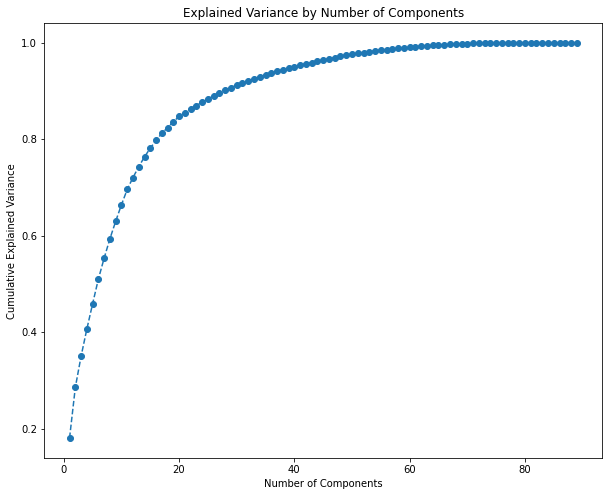

In [11]:
pca = PCA()
pca.fit(demo_df)
plt.figure(figsize = (10, 8))
plt.plot(range(1,90), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [12]:
# Keep the number of components that explain ~80% of the data
pca = PCA(n_components = 16)
pca.fit(demo_df)
scores_pca = pca.transform(demo_df)

Text(0, 0.5, 'Inertia')

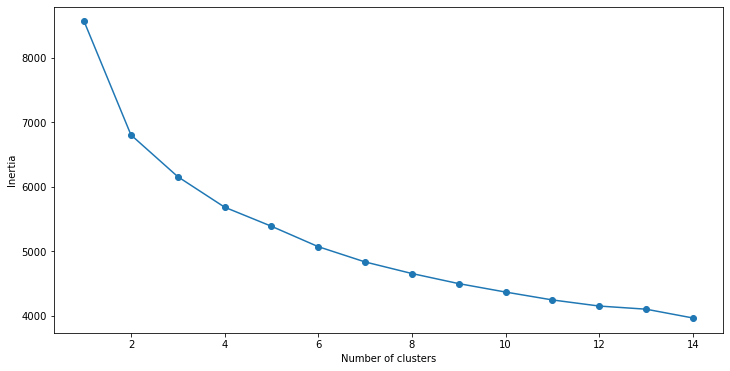

In [13]:
# https://365datascience.com/tutorials/python-tutorials/pca-k-means/
# Also referenced 'Online retailing' Jupyter notebook for how to plot k means clustering plot at 
# different levels of k
SSE = []
for cluster in range(1,15):
    kmeans_pca = KMeans(n_clusters = cluster, init='k-means++')
    kmeans_pca.fit(scores_pca)
    SSE.append(kmeans_pca.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,15), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [14]:
for k in range(2,17):
    kmeans = KMeans(n_clusters = k, init='k-means++')
    kmeans.fit(demo_df)
    print(silhouette_score(scores_pca, kmeans.labels_, metric='euclidean'))

0.22390759479277203
0.14094344776417858
0.16340407040309432
0.17277070545062834
0.15362131655268974
0.15806829203272424
0.1629242287209928
0.16447292816667053
0.17458381498318762
0.17894002070751297
0.18603821173854315
0.19065349006457746
0.19772752416654518
0.17565598648343467
0.1880734301311764


Text(0, 0.5, 'Inertia')

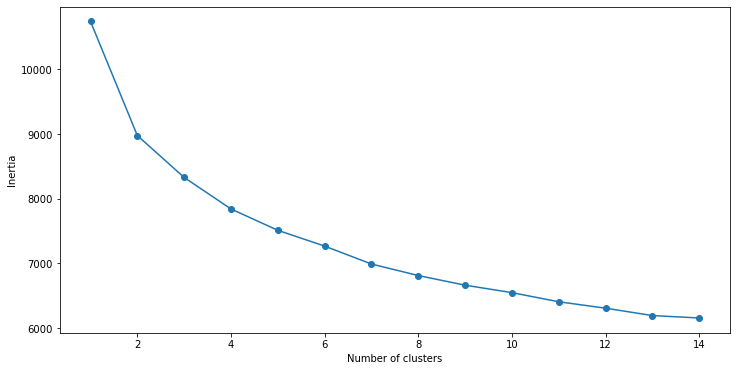

In [15]:
# https://365datascience.com/tutorials/python-tutorials/pca-k-means/
# Also referenced 'Online retailing' Jupyter notebook for how to plot k means clustering plot at 
# different levels of k
SSE = []
for cluster in range(1,15):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(demo_df)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,15), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [24]:
for k in range(2,17):
    kmeans = KMeans(n_clusters = k, init='k-means++')
    kmeans.fit(demo_df)
    print(silhouette_score(demo_df, kmeans.labels_, metric='euclidean'))

0.18012398783278352
0.09806954780074274
0.11441812920295108
0.1255151909196261
0.10192676379930353
0.1021691087213007
0.10040681762969168
0.10858569170797983
0.11262895857287744
0.12048350332138617
0.11450480911925202
0.10768109279982631
0.12403568464998613
0.09903046124311657
0.11561693091323384


In [25]:
# Supervised Learning

In [76]:
X = demo_df
y_col = [x for x in survey_raw.columns if 'QNEW28' in x]
class_map = {'Frequently (every day/weekly)' : 1, 'Occasionally (monthly)' : 2, 
            'Rarely (one to three times a year)' : 3, 'Never' : 4}
y = survey_raw[y_col]
print(y.head())
y = y.applymap(class_map.get)
y = y.values.ravel()
#print(y.head())
display(X.head())
display(y[:5])

  QNEW28 - How frequently do you use a friend or family member's (someone not living in your household) subscription login information  to watch digital content?
0                      Frequently (every day/weekly)                                                                                                             
1                      Frequently (every day/weekly)                                                                                                             
2                      Frequently (every day/weekly)                                                                                                             
3                      Frequently (every day/weekly)                                                                                                             
4                      Frequently (every day/weekly)                                                                                                             


,Q1r1,Q4_Female,Q4_Male,Q2_Alabama,Q2_Alaska,Q2_Arizona,Q2_Arkansas,Q2_California,Q2_Colorado,Q2_Connecticut,Q2_Delaware,Q2_District of Columbia,Q2_Florida,Q2_Georgia,Q2_Hawaii,Q2_Idaho,Q2_Illinois,Q2_Indiana,Q2_Iowa,Q2_Kansas,Q2_Kentucky,Q2_Louisiana,Q2_Maine,Q2_Maryland,Q2_Massachusetts,Q2_Michigan,Q2_Minnesota,Q2_Mississippi,Q2_Missouri,Q2_Montana,Q2_Nebraska,Q2_Nevada,Q2_New Hampshire,Q2_New Jersey,Q2_New Mexico,Q2_New York,Q2_North Carolina,Q2_North Dakota,Q2_Ohio,Q2_Oklahoma,Q2_Oregon,Q2_Pennsylvania,Q2_Rhode Island,Q2_South Carolina,Q2_South Dakota,Q2_Tennessee,Q2_Texas,Q2_Utah,Q2_Vermont,Q2_Virginia,Q2_Washington,Q2_West Virginia,Q2_Wisconsin,Q2_Wyoming,QNEW3_Employed full-time or part-time,QNEW3_Retired,QNEW3_Self-employed,QNEW3_Student,QNEW3_Unemployed,Q5_African American,Q5_Caribbean,Q5_East Asian or Southeast Asian,Q5_Hispanic,Q5_Middle Eastern,Q5_Multiracial,"Q5_Pacific Islander (including Native Hawaiian, Native American, or Native Alaskan)",Q5_Something else not listed here,"Q5_South Asian (India, Pakistan, Sri Lanka)",Q5_White or Caucasian (Non-Hispanic),QNEW1_No,QNEW1_Yes,QNEW2r1_No,QNEW2r1_Yes,QNEW2r2_No,QNEW2r2_Yes,QNEW2r3_No,QNEW2r3_Yes,QNEW2r4_No,QNEW2r4_Yes,QNEW2r5_No,QNEW2r5_Yes,QNEW2r6_No,QNEW2r6_Yes,"Q6_$100,000 to $299,999","Q6_$30,000 to $49,999","Q6_$50,000 to $99,999",Q6_Do not know,"Q6_Less than $29,999","Q6_More than $300,000"
0,0.258824,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.141176,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.211765,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.129412,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.164706,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


array([1, 1, 1, 1, 1], dtype=int64)

In [103]:
unique, counts = np.unique(y, return_counts = True)
print(np.asarray((unique, counts)).T)

[[   1  529]
 [   2  327]
 [   3  160]
 [   4 1115]]


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
display(X_test.head())
print(y_test)

,Q1r1,Q4_Female,Q4_Male,Q2_Alabama,Q2_Alaska,Q2_Arizona,Q2_Arkansas,Q2_California,Q2_Colorado,Q2_Connecticut,Q2_Delaware,Q2_District of Columbia,Q2_Florida,Q2_Georgia,Q2_Hawaii,Q2_Idaho,Q2_Illinois,Q2_Indiana,Q2_Iowa,Q2_Kansas,Q2_Kentucky,Q2_Louisiana,Q2_Maine,Q2_Maryland,Q2_Massachusetts,Q2_Michigan,Q2_Minnesota,Q2_Mississippi,Q2_Missouri,Q2_Montana,Q2_Nebraska,Q2_Nevada,Q2_New Hampshire,Q2_New Jersey,Q2_New Mexico,Q2_New York,Q2_North Carolina,Q2_North Dakota,Q2_Ohio,Q2_Oklahoma,Q2_Oregon,Q2_Pennsylvania,Q2_Rhode Island,Q2_South Carolina,Q2_South Dakota,Q2_Tennessee,Q2_Texas,Q2_Utah,Q2_Vermont,Q2_Virginia,Q2_Washington,Q2_West Virginia,Q2_Wisconsin,Q2_Wyoming,QNEW3_Employed full-time or part-time,QNEW3_Retired,QNEW3_Self-employed,QNEW3_Student,QNEW3_Unemployed,Q5_African American,Q5_Caribbean,Q5_East Asian or Southeast Asian,Q5_Hispanic,Q5_Middle Eastern,Q5_Multiracial,"Q5_Pacific Islander (including Native Hawaiian, Native American, or Native Alaskan)",Q5_Something else not listed here,"Q5_South Asian (India, Pakistan, Sri Lanka)",Q5_White or Caucasian (Non-Hispanic),QNEW1_No,QNEW1_Yes,QNEW2r1_No,QNEW2r1_Yes,QNEW2r2_No,QNEW2r2_Yes,QNEW2r3_No,QNEW2r3_Yes,QNEW2r4_No,QNEW2r4_Yes,QNEW2r5_No,QNEW2r5_Yes,QNEW2r6_No,QNEW2r6_Yes,"Q6_$100,000 to $299,999","Q6_$30,000 to $49,999","Q6_$50,000 to $99,999",Q6_Do not know,"Q6_Less than $29,999","Q6_More than $300,000"
2078,0.658824,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1210,0.611765,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1849,0.505882,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
816,0.235294,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1409,0.070588,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


[4 4 4 ... 4 1 4]


In [78]:
from sklearn import metrics
#We are going to run it for k = 1 to 15 and will be recording testing accuracy, plotting it, showing confusion matrix and classification report:
range_k = range(1,15)
scores = {}
scores_list = []
for k in range_k:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(X_train, y_train)
   y_pred = classifier.predict(X_test)
   scores[k] = metrics.accuracy_score(y_test,y_pred)
   scores_list.append(metrics.accuracy_score(y_test,y_pred))
result1 = metrics.classification_report(y_test, y_pred)
print(scores_list)
print("Classification Report:",)
print (result1)


[0.5168855534709194, 0.4924953095684803, 0.5422138836772983, 0.5609756097560976, 0.5891181988742964, 0.5938086303939962, 0.5956848030018762, 0.599437148217636, 0.6069418386491557, 0.6060037523452158, 0.600375234521576, 0.6125703564727955, 0.6069418386491557, 0.6106941838649156]
Classification Report:
              precision    recall  f1-score   support

           1       0.51      0.66      0.57       287
           2       0.25      0.11      0.15       163
           3       0.00      0.00      0.00        72
           4       0.71      0.82      0.76       544

    accuracy                           0.61      1066
   macro avg       0.37      0.40      0.37      1066
weighted avg       0.54      0.61      0.57      1066



0.6125703564727955


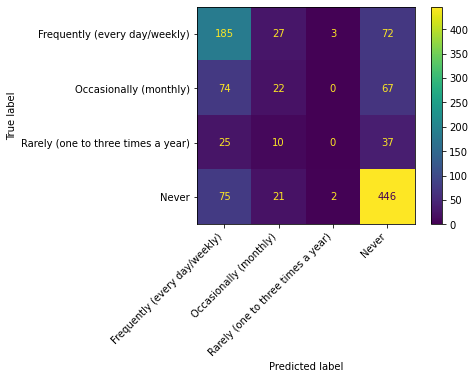

In [82]:
# https://www.geeksforgeeks.org/multiclass-classification-using-scikit-learn/
KNN_Model = KNeighborsClassifier(n_neighbors=12).fit(X_train, y_train)
knn_predictions = KNN_Model.predict(X_test)

# model accuracy for X_test  
accuracy = KNN_Model.score(X_test, y_test)
print(accuracy)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, knn_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Frequently (every day/weekly)', 
                                                                     'Occasionally (monthly)', 
            'Rarely (one to three times a year)', 'Never'])
disp.plot()
plt.xticks(rotation=45, ha='right')
plt.show()

0.6125703564727955


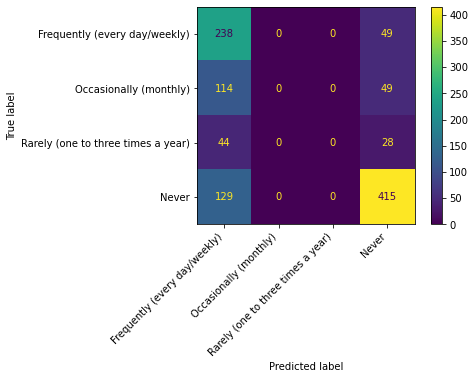

In [83]:
# https://www.geeksforgeeks.org/multiclass-classification-using-scikit-learn/
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

# model accuracy for X_test  
accuracy = dtree_model.score(X_test, y_test)
print(accuracy)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Frequently (every day/weekly)', 
                                                                     'Occasionally (monthly)', 
            'Rarely (one to three times a year)', 'Never'])
disp.plot()
plt.xticks(rotation=45, ha='right')
plt.show()


0.6153846153846154


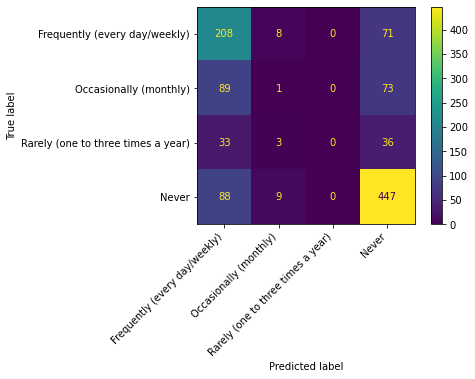

In [84]:
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)
  
# model accuracy for X_test  
accuracy = svm_model_linear.score(X_test, y_test)
print(accuracy)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Frequently (every day/weekly)', 
                                                                     'Occasionally (monthly)', 
            'Rarely (one to three times a year)', 'Never'])
disp.plot()
plt.xticks(rotation=45, ha='right')
plt.show()

### Hyperparameter Tuning

In [56]:
# https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear', 'poly']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.535 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.535 total time=   0.2s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.535 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.540 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.535 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.615 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.601 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.620 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.610 total time=   0.0s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expe

[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.563 total time=   0.1s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.545 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.423 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.568 total time=   0.1s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.540 total time=   0.1s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.521 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.554 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.559 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.549 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.582 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.545 total time=   0.1s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.615 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.601 total time=   0.0s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expe

[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.620 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.610 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.563 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.624 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.577 total time=   0.0s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expe

[CV 3/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.606 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.577 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.559 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.535 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.535 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.535 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.540 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.535 total time=   0.1s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.615 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.601 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.620 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.610 total time=   0.0s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expe

[CV 5/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.563 total time=   0.1s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.535 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.535 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.535 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.540 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.535 total time=   0.0s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expe

[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.535 total time=   0.1s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.535 total time=   0.1s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.535 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expe

[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.540 total time=   0.1s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.535 total time=   0.1s
[CV 1/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.615 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.601 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expe

[CV 3/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.620 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.610 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=0.001, kernel=linear;, score=0.563 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.535 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.535 total time=   0.0s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expe

[CV 3/5] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.535 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.540 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.535 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.535 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.535 total time=   0.1s
[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.535 total time=   0.1s
[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.540 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expe

[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.535 total time=   0.1s
[CV 1/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.615 total time=   0.0s
[CV 2/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.601 total time=   0.0s
[CV 3/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.620 total time=   0.0s
[CV 4/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.610 total time=   0.0s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expe

[CV 5/5] END C=0.1, gamma=0.0001, kernel=linear;, score=0.563 total time=   0.1s
[CV 1/5] END ..C=0.1, gamma=0.0001, kernel=poly;, score=0.535 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.0001, kernel=poly;, score=0.535 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=0.0001, kernel=poly;, score=0.535 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=0.0001, kernel=poly;, score=0.540 total time=   0.0s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ..C=0.1, gamma=0.0001, kernel=poly;, score=0.535 total time=   0.0s
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.563 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.554 total time=   0.1s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.559 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.577 total time=   0.1s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.516 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END .......C=1, gamma=1, kernel=linear;, score=0.592 total time=   0.1s
[CV 2/5] END .......C=1, gamma=1, kernel=linear;, score=0.573 total time=   0.1s
[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=0.643 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .......C=1, gamma=1, kernel=linear;, score=0.592 total time=   0.1s
[CV 5/5] END .......C=1, gamma=1, kernel=linear;, score=0.545 total time=   0.1s
[CV 1/5] END .........C=1, gamma=1, kernel=poly;, score=0.549 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .........C=1, gamma=1, kernel=poly;, score=0.455 total time=   0.1s
[CV 3/5] END .........C=1, gamma=1, kernel=poly;, score=0.545 total time=   0.1s
[CV 4/5] END .........C=1, gamma=1, kernel=poly;, score=0.512 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .........C=1, gamma=1, kernel=poly;, score=0.460 total time=   0.1s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.634 total time=   0.1s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.615 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.620 total time=   0.1s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.587 total time=   0.1s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.545 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expe

[CV 1/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.592 total time=   0.1s
[CV 2/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.573 total time=   0.1s
[CV 3/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.643 total time=   0.1s
[CV 4/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.592 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expe

[CV 5/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.545 total time=   0.1s
[CV 1/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.638 total time=   0.1s
[CV 2/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.606 total time=   0.1s
[CV 3/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.638 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expe

[CV 4/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.573 total time=   0.1s
[CV 5/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.535 total time=   0.1s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.596 total time=   0.1s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.568 total time=   0.1s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.620 total time=   0.1s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.577 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.545 total time=   0.1s
[CV 1/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.592 total time=   0.1s
[CV 2/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.573 total time=   0.1s
[CV 3/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.643 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expe

[CV 4/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.592 total time=   0.1s
[CV 5/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.545 total time=   0.1s
[CV 1/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.535 total time=   0.0s
[CV 2/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.535 total time=   0.0s
[CV 3/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.535 total time=   0.0s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expe

[CV 4/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.540 total time=   0.1s
[CV 5/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.535 total time=   0.0s
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.535 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.535 total time=   0.1s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.535 total time=   0.1s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.540 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.535 total time=   0.1s
[CV 1/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.592 total time=   0.1s
[CV 2/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.573 total time=   0.1s
[CV 3/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.643 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expe

[CV 4/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.592 total time=   0.1s
[CV 5/5] END ...C=1, gamma=0.001, kernel=linear;, score=0.545 total time=   0.1s
[CV 1/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.535 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.535 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.535 total time=   0.0s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expe

[CV 4/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.540 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.535 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.535 total time=   0.1s
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.535 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expe

[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.535 total time=   0.1s
[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.540 total time=   0.1s
[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.535 total time=   0.1s
[CV 1/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.592 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expe

[CV 2/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.573 total time=   0.1s
[CV 3/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.643 total time=   0.1s
[CV 4/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.592 total time=   0.1s
[CV 5/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.545 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expe

[CV 1/5] END ....C=1, gamma=0.0001, kernel=poly;, score=0.535 total time=   0.1s
[CV 2/5] END ....C=1, gamma=0.0001, kernel=poly;, score=0.535 total time=   0.1s
[CV 3/5] END ....C=1, gamma=0.0001, kernel=poly;, score=0.535 total time=   0.0s
[CV 4/5] END ....C=1, gamma=0.0001, kernel=poly;, score=0.540 total time=   0.0s
[CV 5/5] END ....C=1, gamma=0.0001, kernel=poly;, score=0.535 total time=   0.0s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expe

[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.568 total time=   0.1s
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.545 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.559 total time=   0.1s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.568 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.507 total time=   0.1s
[CV 1/5] END ......C=10, gamma=1, kernel=linear;, score=0.577 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ......C=10, gamma=1, kernel=linear;, score=0.573 total time=   0.2s
[CV 3/5] END ......C=10, gamma=1, kernel=linear;, score=0.624 total time=   0.2s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ......C=10, gamma=1, kernel=linear;, score=0.577 total time=   0.2s
[CV 5/5] END ......C=10, gamma=1, kernel=linear;, score=0.563 total time=   0.2s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ........C=10, gamma=1, kernel=poly;, score=0.559 total time=   0.1s
[CV 2/5] END ........C=10, gamma=1, kernel=poly;, score=0.474 total time=   0.1s
[CV 3/5] END ........C=10, gamma=1, kernel=poly;, score=0.521 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ........C=10, gamma=1, kernel=poly;, score=0.516 total time=   0.1s
[CV 5/5] END ........C=10, gamma=1, kernel=poly;, score=0.474 total time=   0.1s
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.615 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.484 total time=   0.1s
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.596 total time=   0.1s
[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.535 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.526 total time=   0.1s
[CV 1/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.577 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.573 total time=   0.1s
[CV 3/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.624 total time=   0.2s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.577 total time=   0.2s
[CV 5/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.563 total time=   0.2s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.573 total time=   0.1s
[CV 2/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.484 total time=   0.1s
[CV 3/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.582 total time=   0.1s
[CV 4/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.549 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expe

[CV 5/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.516 total time=   0.1s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.624 total time=   0.1s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.601 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.629 total time=   0.1s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.606 total time=   0.1s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.573 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.577 total time=   0.2s
[CV 2/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.573 total time=   0.2s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.624 total time=   0.2s
[CV 4/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.577 total time=   0.2s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.563 total time=   0.2s
[CV 1/5] END .....C=10, gamma=0.01, kernel=poly;, score=0.535 total time=   0.1s
[CV 2/5] END .....C=10, gamma=0.01, kernel=poly;, score=0.535 total time=   0.1s
[CV 3/5] END .....C=10, gamma=0.01, kernel=poly;, score=0.535 total time=   0.0s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expe

[CV 4/5] END .....C=10, gamma=0.01, kernel=poly;, score=0.540 total time=   0.0s
[CV 5/5] END .....C=10, gamma=0.01, kernel=poly;, score=0.535 total time=   0.1s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.592 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.582 total time=   0.1s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.624 total time=   0.1s
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.577 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.545 total time=   0.1s
[CV 1/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.577 total time=   0.2s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.573 total time=   0.1s
[CV 3/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.624 total time=   0.2s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.577 total time=   0.2s
[CV 5/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.563 total time=   0.2s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expe

[CV 1/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.535 total time=   0.0s
[CV 2/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.535 total time=   0.0s
[CV 3/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.535 total time=   0.0s
[CV 4/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.540 total time=   0.0s
[CV 5/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.535 total time=   0.0s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.535 total time=   0.1s
[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.535 total time=   0.1s
[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.535 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.540 total time=   0.1s
[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.535 total time=   0.1s
[CV 1/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.577 total time=   0.2s
[CV 2/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.573 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.624 total time=   0.2s
[CV 4/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.577 total time=   0.2s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.563 total time=   0.2s
[CV 1/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.535 total time=   0.0s
[CV 2/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.535 total time=   0.0s
[CV 3/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.535 total time=   0.0s
[CV 4/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.540 total time=   0.0s
[CV 5/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.535 total time=   0.0s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expe

[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.568 total time=   0.1s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.535 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.559 total time=   0.1s
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.573 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.507 total time=   0.1s
[CV 1/5] END .....C=100, gamma=1, kernel=linear;, score=0.577 total time=   1.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .....C=100, gamma=1, kernel=linear;, score=0.573 total time=   1.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .....C=100, gamma=1, kernel=linear;, score=0.624 total time=   1.4s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .....C=100, gamma=1, kernel=linear;, score=0.577 total time=   1.6s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .....C=100, gamma=1, kernel=linear;, score=0.559 total time=   2.8s
[CV 1/5] END .......C=100, gamma=1, kernel=poly;, score=0.554 total time=   0.1s
[CV 2/5] END .......C=100, gamma=1, kernel=poly;, score=0.465 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .......C=100, gamma=1, kernel=poly;, score=0.488 total time=   0.1s
[CV 4/5] END .......C=100, gamma=1, kernel=poly;, score=0.488 total time=   0.1s
[CV 5/5] END .......C=100, gamma=1, kernel=poly;, score=0.498 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.559 total time=   0.1s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.451 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.577 total time=   0.1s
[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.563 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.577 total time=   1.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.573 total time=   1.2s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.624 total time=   1.4s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.577 total time=   1.5s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.559 total time=   2.7s
[CV 1/5] END .....C=100, gamma=0.1, kernel=poly;, score=0.545 total time=   0.1s
[CV 2/5] END .....C=100, gamma=0.1, kernel=poly;, score=0.423 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .....C=100, gamma=0.1, kernel=poly;, score=0.568 total time=   0.1s
[CV 4/5] END .....C=100, gamma=0.1, kernel=poly;, score=0.540 total time=   0.1s
[CV 5/5] END .....C=100, gamma=0.1, kernel=poly;, score=0.521 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.601 total time=   0.1s
[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.573 total time=   0.1s
[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.643 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.568 total time=   0.1s
[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.554 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.577 total time=   1.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.573 total time=   1.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.624 total time=   1.4s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.577 total time=   1.6s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.559 total time=   2.7s
[CV 1/5] END ....C=100, gamma=0.01, kernel=poly;, score=0.624 total time=   0.1s
[CV 2/5] END ....C=100, gamma=0.01, kernel=poly;, score=0.577 total time=   0.0s
[CV 3/5] END ....C=100, gamma=0.01, kernel=poly;, score=0.606 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expe

[CV 4/5] END ....C=100, gamma=0.01, kernel=poly;, score=0.577 total time=   0.0s
[CV 5/5] END ....C=100, gamma=0.01, kernel=poly;, score=0.559 total time=   0.1s
[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.624 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.596 total time=   0.1s
[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.634 total time=   0.1s
[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.624 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.559 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END .C=100, gamma=0.001, kernel=linear;, score=0.577 total time=   1.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .C=100, gamma=0.001, kernel=linear;, score=0.573 total time=   1.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .C=100, gamma=0.001, kernel=linear;, score=0.624 total time=   1.4s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .C=100, gamma=0.001, kernel=linear;, score=0.577 total time=   1.6s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .C=100, gamma=0.001, kernel=linear;, score=0.559 total time=   2.7s
[CV 1/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.535 total time=   0.0s
[CV 2/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.535 total time=   0.0s
[CV 3/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.535 total time=   0.0s
[CV 4/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.540 total time=   0.0s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expe

[CV 5/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.535 total time=   0.0s
[CV 1/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.592 total time=   0.1s
[CV 2/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.582 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.624 total time=   0.1s
[CV 4/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.573 total time=   0.1s
[CV 5/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.545 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END C=100, gamma=0.0001, kernel=linear;, score=0.577 total time=   1.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END C=100, gamma=0.0001, kernel=linear;, score=0.573 total time=   1.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END C=100, gamma=0.0001, kernel=linear;, score=0.624 total time=   1.4s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END C=100, gamma=0.0001, kernel=linear;, score=0.577 total time=   1.6s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END C=100, gamma=0.0001, kernel=linear;, score=0.559 total time=   2.9s
[CV 1/5] END ..C=100, gamma=0.0001, kernel=poly;, score=0.535 total time=   0.0s
[CV 2/5] END ..C=100, gamma=0.0001, kernel=poly;, score=0.535 total time=   0.0s
[CV 3/5] END ..C=100, gamma=0.0001, kernel=poly;, score=0.535 total time=   0.0s
[CV 4/5] END ..C=100, gamma=0.0001, kernel=poly;, score=0.540 total time=   0.0s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expe

[CV 5/5] END ..C=100, gamma=0.0001, kernel=poly;, score=0.535 total time=   0.1s
[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.563 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.535 total time=   0.1s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.554 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.563 total time=   0.1s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.498 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ....C=1000, gamma=1, kernel=linear;, score=0.577 total time=  46.4s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ....C=1000, gamma=1, kernel=linear;, score=0.573 total time=  29.0s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ....C=1000, gamma=1, kernel=linear;, score=0.629 total time=  57.8s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ....C=1000, gamma=1, kernel=linear;, score=0.577 total time=  38.5s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ....C=1000, gamma=1, kernel=linear;, score=0.559 total time=  57.8s
[CV 1/5] END ......C=1000, gamma=1, kernel=poly;, score=0.545 total time=   0.2s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ......C=1000, gamma=1, kernel=poly;, score=0.474 total time=   0.1s
[CV 3/5] END ......C=1000, gamma=1, kernel=poly;, score=0.488 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ......C=1000, gamma=1, kernel=poly;, score=0.488 total time=   0.1s
[CV 5/5] END ......C=1000, gamma=1, kernel=poly;, score=0.488 total time=   0.1s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.573 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.465 total time=   0.1s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.563 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.535 total time=   0.1s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.493 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.577 total time=  44.5s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.573 total time=  28.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.629 total time=  52.7s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.577 total time=  41.8s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.559 total time=  59.3s
[CV 1/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.549 total time=   0.1s
[CV 2/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.455 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.545 total time=   0.1s
[CV 4/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.512 total time=   0.1s
[CV 5/5] END ....C=1000, gamma=0.1, kernel=poly;, score=0.460 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.577 total time=   0.2s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.493 total time=   0.2s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.573 total time=   0.2s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.512 total time=   0.2s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.521 total time=   0.2s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.577 total time=  45.4s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.573 total time=  28.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.629 total time= 1.0min


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.577 total time=  40.0s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.559 total time=  59.7s
[CV 1/5] END ...C=1000, gamma=0.01, kernel=poly;, score=0.638 total time=   0.1s
[CV 2/5] END ...C=1000, gamma=0.01, kernel=poly;, score=0.606 total time=   0.1s
[CV 3/5] END ...C=1000, gamma=0.01, kernel=poly;, score=0.638 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expe

[CV 4/5] END ...C=1000, gamma=0.01, kernel=poly;, score=0.573 total time=   0.1s
[CV 5/5] END ...C=1000, gamma=0.01, kernel=poly;, score=0.535 total time=   0.1s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.587 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.582 total time=   0.1s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.624 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.587 total time=   0.1s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.549 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END C=1000, gamma=0.001, kernel=linear;, score=0.577 total time=  44.7s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END C=1000, gamma=0.001, kernel=linear;, score=0.573 total time=  28.8s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END C=1000, gamma=0.001, kernel=linear;, score=0.629 total time=  52.6s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END C=1000, gamma=0.001, kernel=linear;, score=0.577 total time=  40.7s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END C=1000, gamma=0.001, kernel=linear;, score=0.559 total time=  58.9s
[CV 1/5] END ..C=1000, gamma=0.001, kernel=poly;, score=0.535 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.001, kernel=poly;, score=0.535 total time=   0.0s
[CV 3/5] END ..C=1000, gamma=0.001, kernel=poly;, score=0.535 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=0.001, kernel=poly;, score=0.540 total time=   0.0s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expe

[CV 5/5] END ..C=1000, gamma=0.001, kernel=poly;, score=0.535 total time=   0.1s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.624 total time=   0.1s
[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.587 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.634 total time=   0.1s
[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.624 total time=   0.1s
[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.563 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.577 total time=  46.7s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 2/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.573 total time=  28.8s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.629 total time=  53.4s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 4/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.577 total time=  38.2s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 5/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.559 total time= 1.0min
[CV 1/5] END .C=1000, gamma=0.0001, kernel=poly;, score=0.535 total time=   0.1s
[CV 2/5] END .C=1000, gamma=0.0001, kernel=poly;, score=0.535 total time=   0.1s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 3/5] END .C=1000, gamma=0.0001, kernel=poly;, score=0.535 total time=   0.1s
[CV 4/5] END .C=1000, gamma=0.0001, kernel=poly;, score=0.540 total time=   0.1s
[CV 5/5] END .C=1000, gamma=0.0001, kernel=poly;, score=0.535 total time=   0.0s


/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/kraigsheetz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly']},
             verbose=3)

In [58]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=100, gamma=0.001)


In [85]:
grid = SVC(C = 100, gamma = 0.001, kernel = 'rbf', probability = True)
grid.fit(X_train, y_train)

grid_predictions = grid.predict(X_test)

# model accuracy for X_test  
accuracy = grid.score(X_test, y_test)
print(accuracy)
  
# print classification report
print(metrics.classification_report(y_test, grid_predictions))

0.624765478424015
              precision    recall  f1-score   support

           1       0.51      0.70      0.59       287
           2       0.00      0.00      0.00       163
           3       0.00      0.00      0.00        72
           4       0.69      0.85      0.76       544

    accuracy                           0.62      1066
   macro avg       0.30      0.39      0.34      1066
weighted avg       0.49      0.62      0.55      1066



C:\Users\KraigSheetz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KraigSheetz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KraigSheetz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


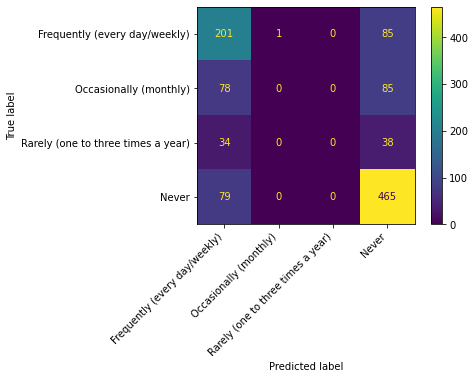

In [86]:
cm = confusion_matrix(y_test, grid_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Frequently (every day/weekly)', 
                                                                     'Occasionally (monthly)', 
            'Rarely (one to three times a year)', 'Never'])
disp.plot()
plt.xticks(rotation=45, ha='right')
plt.show()

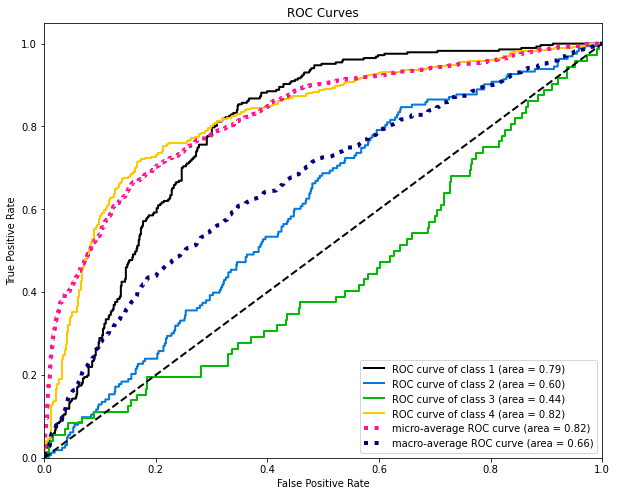

In [97]:
# https://towardsdatascience.com/how-to-deal-with-imbalanced-multiclass-datasets-in-python-fe0bb3f2b669
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

y_score = grid.predict_proba(X_test)

# Plot metrics 
ax = plot_roc(y_test, y_score)
ax.figure.set_size_inches(10,8)
plt.show()

### Redoing SVM with Hyperparameter tuning on Class Weights

In [39]:
print(y.value_counts())

QNEW28 - How frequently do you use a friend or family member's (someone not living in your household) subscription login information  to watch digital content?
4                                                                                                                                                                  1115
1                                                                                                                                                                   529
2                                                                                                                                                                   327
3                                                                                                                                                                   160
dtype: int64


In [99]:
balance = [{1:1 , 2:1, 3:1, 4:1}, {1:2 , 2:3, 3:5, 4:1}, {1:1, 2:2, 3:3, 4:1},
          {1:2 , 2:2, 3:3, 4:1}, {1:2 , 2:3, 3:4, 4:1}, {1:2, 2:4, 3:6, 4:1}]
param_grid = dict(class_weight = balance)

In [68]:
# https://machinelearningmastery.com/cost-sensitive-svm-for-imbalanced-classification/
from sklearn.model_selection import RepeatedStratifiedKFold
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=SVC(), param_grid=param_grid, n_jobs=-1, cv=cv, 
                    scoring='accuracy', verbose = 3)
grid_result = grid.fit(X, y)

Fitting 30 folds for each of 6 candidates, totalling 180 fits


In [69]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.610512 using {'class_weight': {1: 1, 2: 1, 3: 1, 4: 1}}
0.610512 (0.016595) with: {'class_weight': {1: 1, 2: 1, 3: 1, 4: 1}}
0.550279 (0.030000) with: {'class_weight': {1: 2, 2: 3, 3: 5, 4: 1}}
0.574683 (0.021290) with: {'class_weight': {1: 1, 2: 2, 3: 3, 4: 1}}
0.589541 (0.022137) with: {'class_weight': {1: 2, 2: 2, 3: 3, 4: 1}}
0.563108 (0.028294) with: {'class_weight': {1: 2, 2: 3, 3: 4, 4: 1}}
0.524472 (0.028869) with: {'class_weight': {1: 2, 2: 4, 3: 6, 4: 1}}


In [100]:
grid = SVC(C = 100, gamma = 0.001, kernel = 'rbf', probability = True, class_weight = {1:2, 2:2, 3:3, 4:1})
grid.fit(X_train, y_train)

grid_predictions = grid.predict(X_test)

# model accuracy for X_test  
accuracy = grid.score(X_test, y_test)
print(accuracy)
  
# print classification report
print(metrics.classification_report(y_test, grid_predictions))

0.5872420262664165
              precision    recall  f1-score   support

           1       0.47      0.76      0.58       287
           2       0.22      0.12      0.16       163
           3       0.03      0.01      0.02        72
           4       0.81      0.71      0.76       544

    accuracy                           0.59      1066
   macro avg       0.38      0.40      0.38      1066
weighted avg       0.58      0.59      0.57      1066



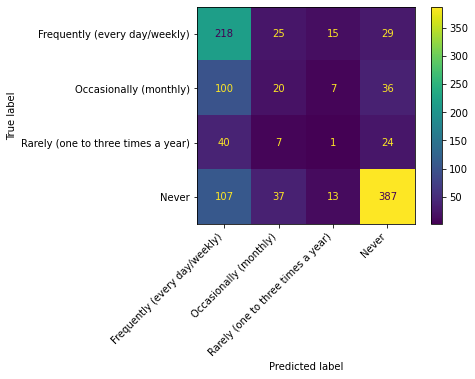

In [101]:
cm = confusion_matrix(y_test, grid_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Frequently (every day/weekly)', 
                                                                     'Occasionally (monthly)', 
            'Rarely (one to three times a year)', 'Never'])
disp.plot()
plt.xticks(rotation=45, ha='right')
plt.show()

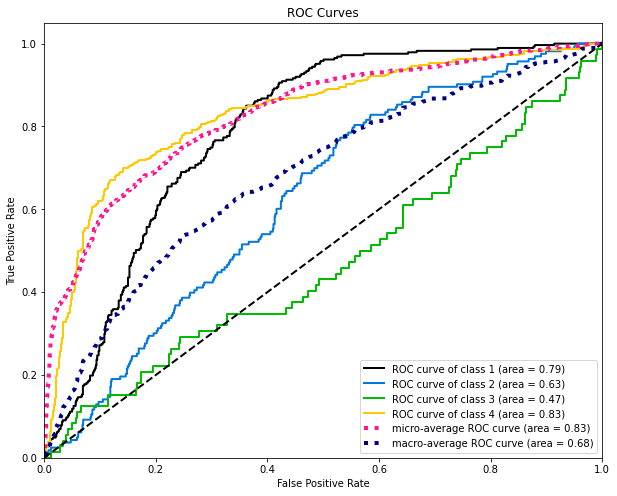

In [102]:
# https://towardsdatascience.com/how-to-deal-with-imbalanced-multiclass-datasets-in-python-fe0bb3f2b669
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

y_score = grid.predict_proba(X_test)

# Plot metrics 
ax = plot_roc(y_test, y_score)
ax.figure.set_size_inches(10,8)
plt.show()